In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [0]:
df=pd.read_csv('titanic_data.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we have a general idea of the data set contents.

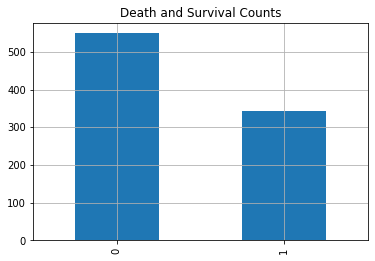

In [0]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()

From this,we infer that majority of people did not survive the accident.

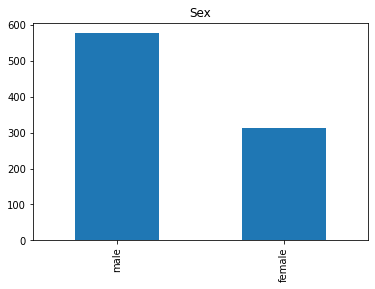

In [0]:
df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()

It can be infered that the majority of people in the ship were male.

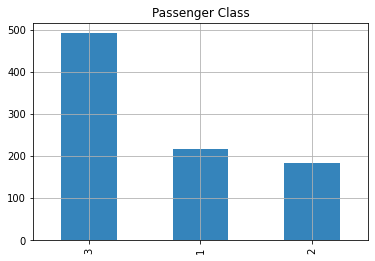

In [0]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()

It can be infered that the largest number of passengers were in class 3 followed by class 1 and class 2.

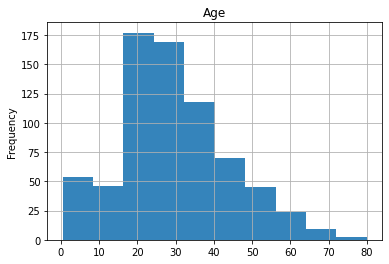

In [0]:
df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()

It can be infered that majority of passengers were in the age group 15-30 years.

# Feature1 : Passenger Class 

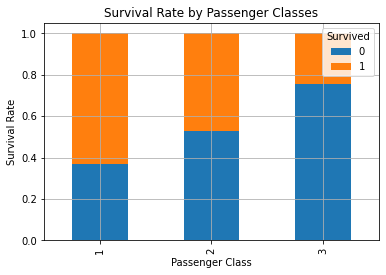

In [0]:
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Those in First Class has the highest chance for survival.

# Feature2 : Sex

We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

In [0]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


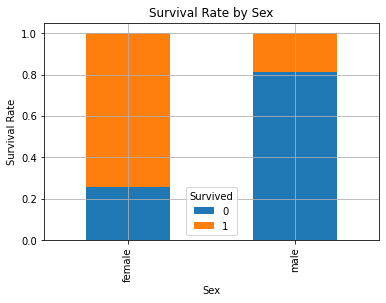

In [0]:
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True) 
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

The majority of females survived, whereas the majority of males did not.

Count males and females in each Pclass:

In [0]:
# Get the unique values of Pclass:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [0]:
for i in passenger_classes:
        print ('M : ',i ,len(df[(df['Sex'] == 'male')  & (df['Pclass'] == i)]))
        print ('F : ',i ,len(df[(df['Sex'] =='female') & (df['Pclass'] == i)]))
male=df[df['Sex']=='male']
female=df[df['Sex']=='female']

M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


Plot survival rate by Sex and Pclass:

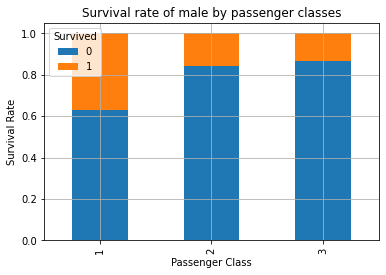

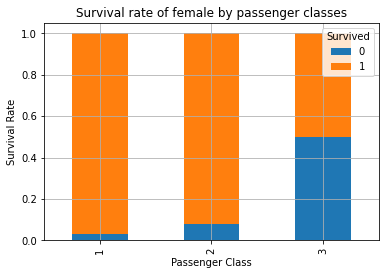

In [0]:
male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [0]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())

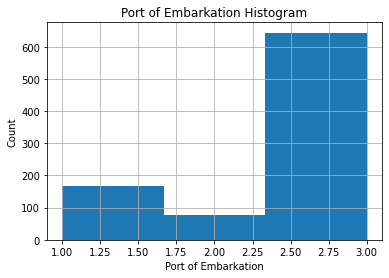

In [0]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

# Feature3: Embarked

In [0]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,NaN


Thus we can see that the Embarked Column is missing certain values, which have to be filled otherwise it may cause problems during the machine learning algorithms.

In [0]:
df['Embarked_Value']=df['Embarked']
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,C


We make a new column 'Embarked_Value'and replace C,Q,S with 1,2,3 so that we can carry out our machine learning algorithms on it.

In [0]:
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)

In [0]:
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0, nan]

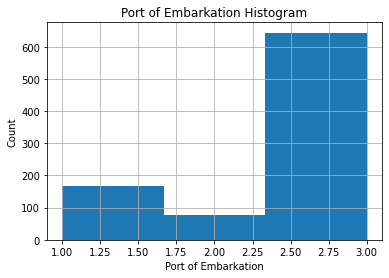

In [0]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S':

In [0]:
df['Embarked_Value']=df['Embarked_Value'].fillna(3)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0]

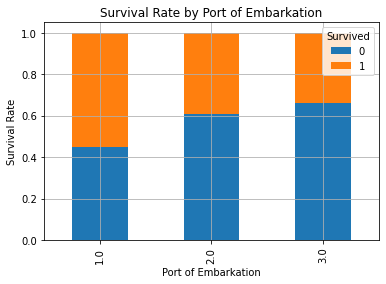

In [0]:
embarked_rel=pd.crosstab(df['Embarked_Value'],df['Survived'])
embarked_rel_normalize=embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate by Port of Embarkation',grid='True',stacked='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

# Feature4 : Age

In [0]:
df[df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,3.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,2.0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1,3.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,1.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0,2.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,1.0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1,1.0


Here also many ages are missing. So we assign the missing ages the median values of the age 
according to their sex and passenger class.

In [0]:
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex_Val'],df['Pclass']]).apply(lambda x: x.fillna(x.median()))
df['Age_complete'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_complete, dtype: float64

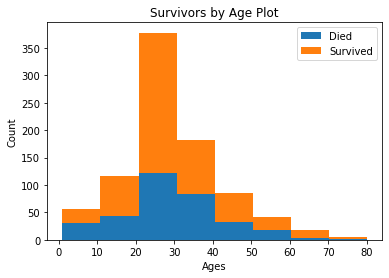

In [0]:
age_survived=df[df['Survived']==1]['Age_complete']
age_not_survived = df[df['Survived'] == 0]['Age_complete']
max_age=max(df['Age_complete'])

plt.hist([age_survived,age_not_survived],bins=8,range=(1, max_age),stacked=True)
plt.title('Survivors by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()

For more detailed analysis,we draw the age density plots.

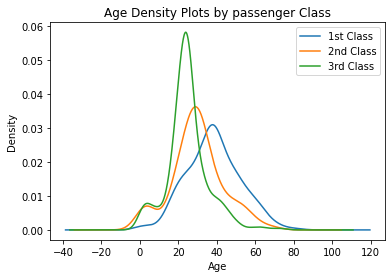

In [0]:
for i in passenger_classes :
        df.Age_complete[df.Pclass==i].plot(kind='density')
plt.title('Age Density Plots by passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

Thus we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.

# Feature5 : Family Size

We define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

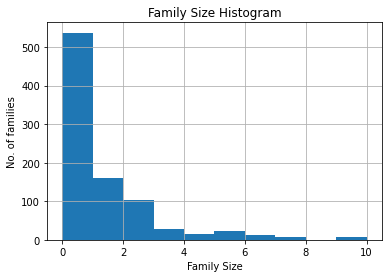

In [0]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].hist(bins=10)
plt.xlabel('Family Size')
plt.ylabel('No. of families')
plt.title('Family Size Histogram')
plt.show()


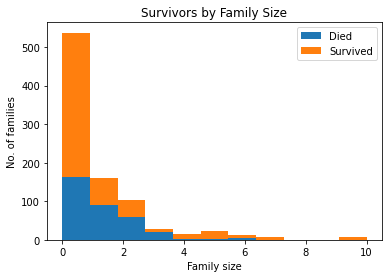

In [0]:
family_sizes=sorted(df['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df[df['Survived']==1]['Family_Size']
family_size_not_survived=df[df['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors by Family Size')
plt.show()

# Data for machine learning

We drop the columns having strings in it or those which we have used like we remove SibSp and Parch as we use Family_Size which has the attributes of both of them.

In [0]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]
df=df.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)
df.head(10)

,Survived,Pclass,Fare,Sex_Val,Age_complete,Family_Size
0,0,3,7.2500,1,22.0,1
1,1,1,71.2833,0,38.0,1
2,1,3,7.9250,0,26.0,0
3,1,1,53.1000,0,35.0,1
4,0,3,8.0500,1,35.0,0
5,0,3,8.4583,1,25.0,0
6,0,1,51.8625,1,54.0,0
7,0,3,21.0750,1,2.0,4
8,1,3,11.1333,0,27.0,2
9,1,2,30.0708,0,14.0,1


It is a summary of the operations we performed on our training data set. We encapsulate this in a function since we'll need to do the same operations to our test set later.

In [0]:
def data_prep(df_given):
    # Get the unique values of Sex
    sexes = sorted(df_given['Sex'].unique())
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
   # Transform Sex from a string to a number representation
    df_given['Sex_Val'] = df_given['Sex'].map(genders_mapping).astype(int)
        # Get the unique values of Embarked
    df_given['Embarked_Value']=df_given['Embarked']
    df_given['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
    df_given['Embarked_Value']=df_given['Embarked_Value'].fillna(3)
   # embarked_locs = sorted(df_given['Embarked_Value'].unique())
    # Fill in missing values of Fare with the average Fare
    if len(df_given[df_given['Fare'].isnull()] > 0):
        avg_fare = df_given['Fare'].mean()
        df_given['Fare'].fillna(avg_fare, inplace=True)
    df_given['Age_complete'] = df_given['Age']
    df_given['Age_complete']=df_given['Age_complete'].groupby([df_given['Sex_Val'],df_given['Pclass']]).apply(lambda x: x.fillna(x.median()))
    df_given['Family_Size'] = df_given['SibSp'] + df_given['Parch']
    # Drop the columns we won't use:
    # Drop the Age column since we will be using the Age_omplete column instead.
    # Drop the SibSp and Parch columns since we will be using Family_Size.
    # Drop the PassengerId column since it won't be used as a feature.
    df_given=df_given.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)#axis=1 means columns
    #if drop_passenger_id:
     #   df_given = df_given.drop(['PassengerId'], axis=1)
    
    return df_given


We store the data as numpy array to perform machine learning algorithms.

In [0]:
train_data=df.values

# Naive_Bayes Classifier

In [0]:
clf = GaussianNB()

train_features includes all the columns except the Survived.
train_target includes the Survived column.

In [0]:
train_features = train_data[:, 1:]
train_target = train_data[:, 0]


We fit the classifier

Reading and converting the test data to numpy array

In [0]:
df_test1 = pd.read_csv('C:/Users/R AMARTYA/Desktop/test.csv')    
df_test = data_prep(df_test1)
test_x1 = df_test.values


FileNotFoundError: ignored

test_y1 is the predicted Survival values of the test data and thus our answer.

Now we check the accuracy of our databy training with 80% of our data and testing on rest 20%

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.20, random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 5) (891,)
(712, 5) (712,)
(179, 5) (179,)


train_test_split here means that train_x and test_x are made from train_features and train_y and test_y are made from train_target

In [0]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Naive Bayes Accuracy = 0.82


In [0]:
test_y = clf.predict(test_x)
test_y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0.])

test_y1 is the predicted values of our test data i.e. test_x1

In [0]:
df_test['Survived'] = test_y
df_test[['PassengerId','Survived']].to_csv('submission1.csv',index=False)

NameError: ignored

In [0]:
RandomForest = RandomForestClassifier(n_estimators=1000)
RandomForest.fit(train_x,train_y)
predict_y = RandomForest.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))


RandomForest Accuracy = 0.84


In [0]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
predict_y = knn.predict(test_x)
print ("Kmeans Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Kmeans Accuracy = 0.75


In [0]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
predict_y = logreg.predict(test_x)
print ("Regression Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))


Regression Accuracy = 0.92


In [0]:
svc = SVC()
svc.fit(train_x, train_y)
predict_y = svc.predict(test_x)
print ("SVC Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

SVC Accuracy = 0.74


In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predict_y = decision_tree.predict(test_x)
print ("Decision Tree Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Decision Tree Accuracy = 0.80


In [0]:
sgd = SGDClassifier(max_iter=100)
sgd.fit(train_x, train_y)
predict_y = sgd.predict(test_x)
print ("Gradient Descent Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))


Gradient Descent Accuracy = 0.82
